Sample data:
    CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5    Male   31                  17                      40

Missing values:
 Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


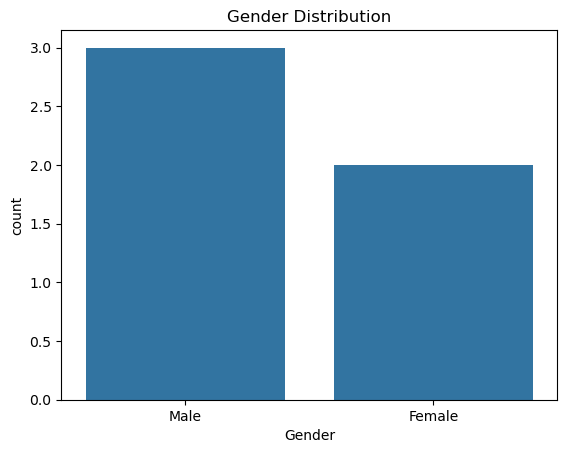

c:\Users\ugaur\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ugaur\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ugaur\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ugaur\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

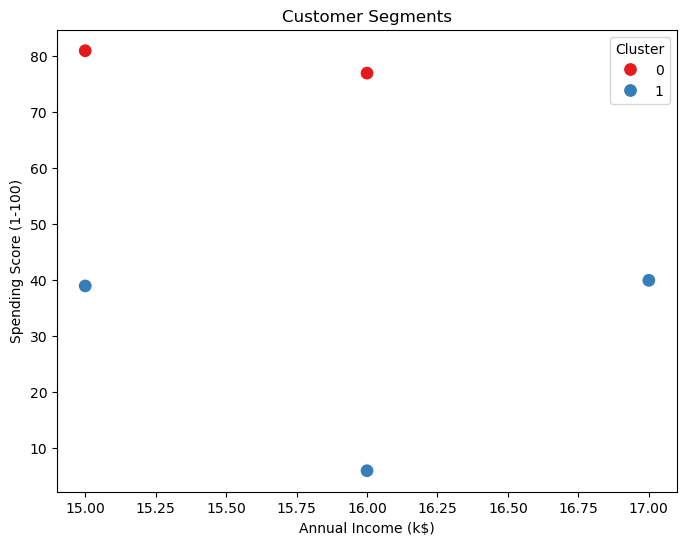

In [3]:
# Customer Segmentation using K-Means Clustering

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Load dataset
df = pd.read_csv("dataset/Mall_Customers.csv")
print("Sample data:\n", df.head())

# Drop CustomerID column
df = df.drop('CustomerID', axis=1)

# Optional: Check for nulls
print("\nMissing values:\n", df.isnull().sum())

# Visualize Gender Distribution
sns.countplot(data=df, x='Gender')
plt.title("Gender Distribution")
plt.savefig("output/gender_distribution.png")
plt.show()

# Convert 'Gender' to numerical
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Select features for clustering
X = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Elbow method to find optimal k (reduced to 5 because only 5 samples)
wcss = []
for i in range(1, 6):  # <= change this to 6 instead of 11
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Apply KMeans with optimal k (set to 2–3 for tiny dataset)
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)


# Add cluster labels to dataset
df['Cluster'] = y_kmeans

# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='Set1', s=100)
plt.title("Customer Segments")
plt.savefig("output/customer_clusters.png")
plt.show()
